In [1]:
from PIL import Image
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
path_to_dataset = '../data/dataset/'
train_images_folder = os.path.join(path_to_dataset, 'train_images')
train_table_path = os.path.join(path_to_dataset, 'train.csv')

In [3]:
train_table = pd.read_csv(train_table_path).fillna(-1)

In [4]:
train_table.head(15)

,ImageId_ClassId,EncodedPixels
0,0002cc93b.jpg_1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0002cc93b.jpg_2,-1
2,0002cc93b.jpg_3,-1
3,0002cc93b.jpg_4,-1
4,00031f466.jpg_1,-1
5,00031f466.jpg_2,-1
6,00031f466.jpg_3,-1
7,00031f466.jpg_4,-1
8,000418bfc.jpg_1,-1
9,000418bfc.jpg_2,-1


In [31]:
def rleToMask(rleString,height,width):
    rows, cols = height, width
    if rleString == -1:
        return np.zeros((height, width))
    else:
        rleNumbers = [int(numstring) for numstring in rleString.split(' ')]
        rlePairs = np.array(rleNumbers).reshape(-1,2)
        img = np.zeros(rows*cols,dtype=np.uint8)
        for index,length in rlePairs:
            index -= 1
            img[index:index+length] = 255
            img = img.reshape(cols,rows)
            img = img.T
        return img
    
def rle2mask(rle, height, width):    
    mask = np.zeros( width*height ).astype(np.uint8)
    
    array = np.asarray([int(x) for x in rle.split()])
    starts = array[0::2]
    lengths = array[1::2]

    current_position = 0
    for index, start in enumerate(starts):
        mask[int(start):int(start+lengths[index])] = 255
        current_position += lengths[index]
        
    return mask.reshape(width, height).T

In [8]:
channels_data = {}
for img_id_class, data in train_table.values:
    img_id, channel_class = img_id_class.split('_')
    
    if img_id not in channels_data.keys():
        channels_data[img_id] = {}
    
    channels_data[img_id][int(channel_class)] = data

In [33]:
images_names_list = list(set(map(lambda x: x.split('_')[0], train_table.values[:, 0])))
i = 0
images_names_list[i], channels_data[images_names_list[i]]

('d572dc596.jpg',
 {1: -1,
  2: -1,
  3: '102954 6 103210 18 103466 30 103722 42 103978 54 104234 66 104489 78 104745 90 105001 102 105257 114 105513 126 105769 138 106029 145 106292 150 106555 155 106819 159 107082 164 107345 169 107608 168 107871 161 108134 153 108398 145 108661 138 108924 131 109187 123 109450 116 109714 108 109977 101 110240 93 110503 86 110766 79 111029 71 111293 63 111556 56 111819 49 112082 41 112345 34 112608 27 112872 19 113135 11 113398 4',
  4: -1})

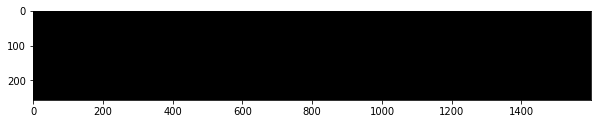

In [19]:
plt.figure(figsize=(10, 10))
plt.imshow(rleToMask(channels_data[images_names_list[i]][3], 256, 1600), 'gray')
plt.show()

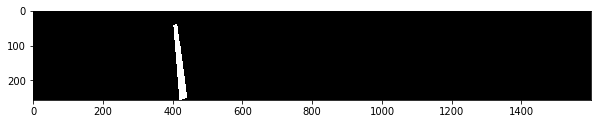

In [32]:
plt.figure(figsize=(10, 10))
plt.imshow(rle2mask(channels_data[images_names_list[i]][3], 256, 1600), 'gray')
plt.show()

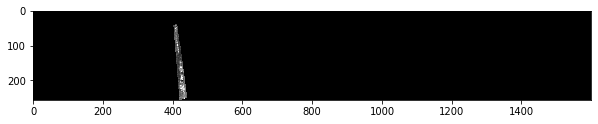

In [41]:
plt.figure(figsize=(10, 10))
plt.imshow(
    cv2.imread(os.path.join(train_images_folder, images_names_list[i]), 0) *\
    (rle2mask(channels_data[images_names_list[i]][3], 256, 1600) // 255), 
    'gray'
)
plt.show()